# Time and zonal mean anomalies from a control run

Load modules

In [1]:
using Plots
using NCDatasets
using Statistics: mean

Setup run-time enviromnent

In [2]:
ENV["GKSwstype"] = "100"

"100"

useful functions

In [8]:
function get_time_mean_spectra(file_name, var_name, t_spinup,nan_fill_value);
    ds = NCDataset(file_name, "r");
    m = ds["m"][:];
    m_t = ds["m_t"][:]; 
    n = ds["n"][:]; 
    lat = ds["lat"][:]; 
    z = ds["level"][:] / 1e3; # height in kilometers
    time = ds["time"][:];
    var = ds[var_name][:];
    var=var[:, :, :, t_spinup:end]; # cut out the spinup;
    data_mean = mean( var[:,:,:,:], dims=4); # lon, lat,lev, time
    replace!(data_mean, NaN=>nan_fill_value)
    return (m, m_t), (lat, n), z , data_mean
    none
end

function get_min_max(var);
    #replace!(var, NaN=>nan_fill_value)
    vmax = maximum(filter(!isnan,var))
    vmin = minimum(filter(!isnan,var))
    return vmin-1e-10,vmax+1e-10
    none
end

get_min_max (generic function with 1 method)

Find required files and print their info

In [9]:
CLIMA_NETCDF = "../netcdf/"; #location of .nc files
fnames = filter(x -> occursin("Spectra", x), readdir( CLIMA_NETCDF ) );

ds = NCDataset("$CLIMA_NETCDF/"fnames[1], "r")

NCDataset: ../netcdf//HeldSuarez_Spectra-2020-09-16T08.21.45.556.nc
Group: /

Dimensions
   m = 32
   m_t = 22
   n = 23
   level = 31
   lat = 32
   time = 3

Variables
  m   (32)
    Datatype:    Float64
    Dimensions:  m

  m_t   (22)
    Datatype:    Float64
    Dimensions:  m_t

  n   (23)
    Datatype:    Float64
    Dimensions:  n

  level   (31)
    Datatype:    Float64
    Dimensions:  level

  lat   (32)
    Datatype:    Float64
    Dimensions:  lat

  time   (3)
    Datatype:    Float64
    Dimensions:  time
    Attributes:
     units                = seconds since 1900-01-01 00:00:00
     long_name            = time

  spectrum_1d   (32 × 32 × 31 × 3)
    Datatype:    Float64
    Dimensions:  m × lat × level × time

  spectrum_2d   (22 × 23 × 31 × 3)
    Datatype:    Float64
    Dimensions:  m_t × n × level × time



Select the variable to plot

In [10]:
var_name_list = Any["spectrum_1d","spectrum_2d"];
plot_anomaly = true;
nan_fill_value = 0
t_spinup = 1
height_index = 2

nexp = size(fnames)[1]
nvar = size(var_name_list)[1]

2

exptract data and calculate anomalise from ctrl (assumes to be fnames[1] here)

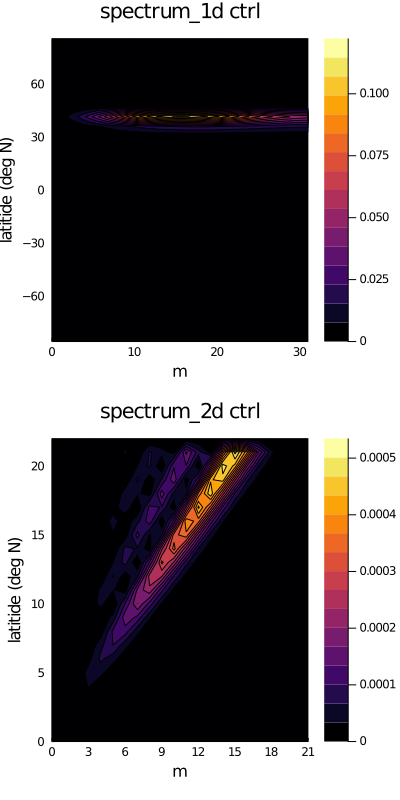

In [15]:
plot_array = Any[];
for n in 1:nvar
    title_v = var_name_list[n]
    m_mt, lat_n, z,  vs_ctrl = get_time_mean_spectra( "$CLIMA_NETCDF/"fnames[1], var_name_list[n], t_spinup, nan_fill_value)
    xdim = m_mt[n]
    ydim = lat_n[n]
    clims = get_min_max(vs_ctrl)
    for i in 1:nexp
        if i ==1
            title = title_v*" ctrl"
            one_plot = contourf( xdim, ydim, (vs_ctrl[:,:,height_index,1])', title = title, ylabel="latitide (deg N)", xlabel="m", clims = clims);
        else
            title = title_v*" ex$i-ctrl"
            m_mt, lat_n, z, vs  = get_time_mean_spectra( "$CLIMA_NETCDF/"fnames[i], var_name_list[n], t_spinup, nan_fill_value);
            if i ==2
                clims =get_min_max(vs-vs_ctrl)
            end
            one_plot = contourf( xdim, ydim, ((vs-vs_ctrl)[:,:,height_index,1])', title = title, ylabel="n", xlabel="m", clims = clims);
        end
        push!(plot_array,one_plot); # make a plot and add it to the plot_array
    end
end

fig=plot(plot_array... , layout=(nvar,nexp), size=(nexp*400, nvar*400) )
savefig(fig, string("plot_time_GCM_spectra.pdf"));
display(fig)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*